In [14]:
# import essential libs
from random import random

from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.cluster.rock import rock
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster import cluster_visualizer,cluster_visualizer_multidim
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [63]:
def print_clusters(clusters):
    clusters_data = []
    for i in range(len(clusters)):
        cluster_data = []
        for j in clusters[i]:
            cluster_data.append([int(k) for k in data[j]])
        clusters_data.append(cluster_data)
        print(f"=> Cluster {i}: {cluster_data}")
    print()
    return clusters_data

def onehot_converter(data, onehot_len):
    onehot_data = []
    for transaction in data:
        onehot_transaction = [0 for i in range(onehot_len)]
        for item in transaction:
            onehot_transaction[int(item)-1] = 1
        onehot_data.append(onehot_transaction)
    return onehot_data


NUM_CLUSTERS = 2
THETA = 0.2
DATA_SAMPLE_PATH = './data_examples/market_basket_data_samples_1.txt'


data = read_sample(DATA_SAMPLE_PATH)
print("==> ROCK Clustering Results...")
# ROCK instance initialization and clustering
rock_instance = rock(data, NUM_CLUSTERS, theta=THETA)
rock_instance.process()
clusters = rock_instance.get_clusters()
print_clusters(clusters)
# visualize by pyclusetering
# visualizer = cluster_visualizer()
# visualizer.append_clusters(clusters, data)
# visualizer.show()

data = read_sample(DATA_SAMPLE_PATH)
if DATA_SAMPLE_PATH == './data_examples/market_basket_data_samples_1.txt':
    onehot_data = onehot_converter(data, 6) 
else:
    onehot_data = onehot_converter(data, 7) 
# print(f"onehot_data: {onehot_data}")
print("==> KMeans Clustering Results...")
# create instance of K-Means algorithm
if DATA_SAMPLE_PATH == './data_examples/market_basket_data_samples_1.txt':
    kmeans_instance = kmeans(onehot_data, [ [1, 1, 1, 0, 1, 0], [0, 0, 0, 0, 0, 1] ])
else:
    kmeans_instance = kmeans(onehot_data, [ [1, 1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 1] ])
# run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
print_clusters(clusters)


print("==> KMeans++ Clustering Results...")
# initialize initial centers using K-Means++ method
initial_centers = kmeans_plusplus_initializer(onehot_data, 2).initialize()
# create instance of K-Means algorithm with prepared centers
kmeans_instance = kmeans(onehot_data, initial_centers)
# run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
# final_centers = kmeans_instance.get_centers()
print_clusters(clusters)

==> ROCK Clustering Results...
=> Cluster 0: [[1, 2, 3, 5], [2, 3, 4, 5], [1, 4]]
=> Cluster 1: [[6]]

==> KMeans Clustering Results...
=> Cluster 0: [[1, 2, 3, 5], [2, 3, 4, 5]]
=> Cluster 1: [[1, 4], [6]]

==> KMeans++ Clustering Results...
=> Cluster 0: [[1, 4], [6]]
=> Cluster 1: [[1, 2, 3, 5], [2, 3, 4, 5]]



[[[1, 4], [6]], [[1, 2, 3, 5], [2, 3, 4, 5]]]

[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1

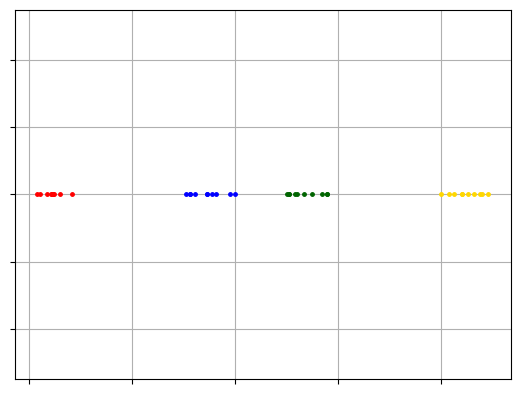

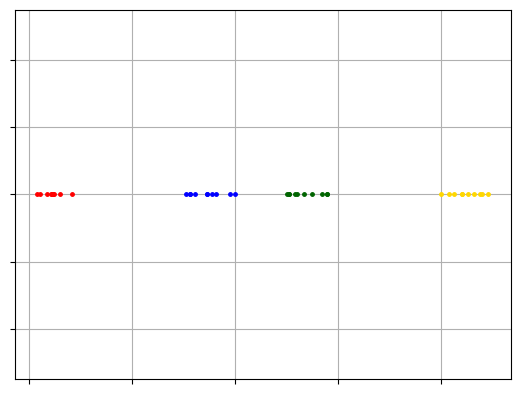

In [2]:
# random data example generatoin
data = [ [random()] for i in range(10) ] + [ [random() + 3] for i in range(10) ] + [ [random() + 5] for i in range(10) ] + [ [random() + 8] for i in range(10) ]

# ROCK instance initializatioin and clustering sampled data
rock_instance = rock(data, 1.0, 4, 0.5)
rock_instance.process()
clusters = rock_instance.get_clusters()

# visualize by pyclustering
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, data)
visualizer.show()

[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

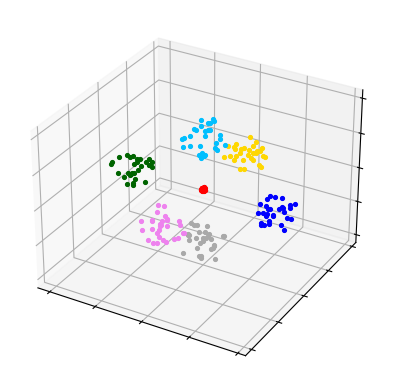

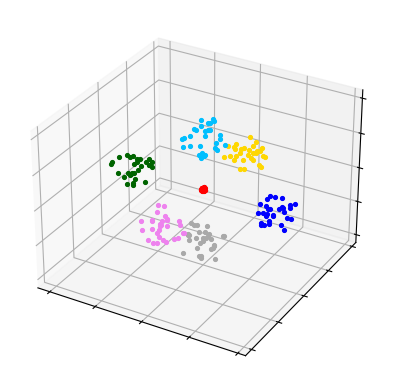

In [3]:
# data sampling by pyclustering implemented FCPS_SAMPLES.SAMPLE_HEPTA mode
data = read_sample(FCPS_SAMPLES.SAMPLE_HEPTA)

# ROCK instance initialization and clustering
rock = rock(data, 1.0, 7)
rock.process()
clusters = rock.get_clusters()

# visualize by pyclusetering
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, data)
visualizer.show()

> Reference: [Hands-On Guide To ROCK Clustering Algorithm](https://analyticsindiamag.com/hands-on-guide-to-rock-clustering-algorithm/)